In [1]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dropout (Dropout)           (None, 129600)            0

In [3]:
TRAINING_DIR = "./train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1083 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [4]:
train_generator[0]

(array([[[[1.5039834e-01, 1.4342070e-01, 7.1304426e-02],
          [1.8978745e-01, 1.7561531e-01, 9.9901788e-02],
          [1.6484869e-01, 1.4436144e-01, 6.4171277e-02],
          ...,
          [3.9215689e-03, 1.1764707e-02, 0.0000000e+00],
          [3.8228007e-03, 1.1665938e-02, 9.8768287e-05],
          [3.3709682e-03, 1.1214105e-02, 5.5060064e-04]],
 
         [[1.3770124e-01, 1.3178168e-01, 6.0194463e-02],
          [1.9772314e-01, 1.8460909e-01, 1.0942461e-01],
          [1.5532584e-01, 1.3536766e-01, 5.6235593e-02],
          ...,
          [1.3036672e-05, 7.8561744e-03, 3.9085322e-03],
          [4.3879569e-04, 8.2819331e-03, 4.3603648e-03],
          [8.9062809e-04, 8.7337662e-03, 4.8121968e-03]],
 
         [[1.2500414e-01, 1.2014268e-01, 4.9084507e-02],
          [2.0565881e-01, 1.9360287e-01, 1.1894744e-01],
          [1.5170011e-01, 1.3244966e-01, 5.4196980e-02],
          ...,
          [4.2485595e-03, 1.2091697e-02, 8.1701288e-03],
          [4.7003920e-03, 1.2543529e-

In [5]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [6]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

<ipython-input-6-6272b23e5a0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
109/109 [==============================] - 159s 1s/step - loss: 0.7332 - acc: 0.5946 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 2/10
109/109 [==============================] - 162s 1s/step - loss: 0.6764 - acc: 0.6066 - val_loss: 0.6996 - val_acc: 0.5000
Epoch 3/10
109/109 [==============================] - 157s 1s/step - loss: 0.4933 - acc: 0.7424 - val_loss: 0.2326 - val_acc: 0.9072
Epoch 4/10
109/109 [==============================] - 163s 1s/step - loss: 0.3268 - acc: 0.8587 - val_loss: 0.1211 - val_acc: 0.9485
Epoch 5/10
109/109 [==============================] - 163s 1s/step - loss: 0.2719 - acc: 0.8920 - val_loss: 0.0894 - val_acc: 0.9691
Epoch 6/10
109/109 [==============================] - 154s 1s/step - loss: 0.2335 - acc: 0.9160 - val_loss: 0.0853 - val_acc: 0.9742
Epoch 7/10
109/109 [==============================] - 153s 1s/step - loss: 0.2725 - acc: 0.8883 - val_loss: 0.0873 - val_acc: 0.9691
Epoch 8/10
109/109 [==============================] - 165s 1s/step - 

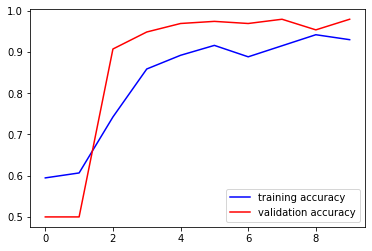

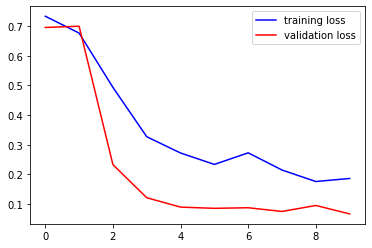

In [7]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [8]:
labels_new = ['Mask', 'No mask']

In [9]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

NameError: name 'y_test' is not defined